📡 Fetching Sudoku from API...
🎯 Difficulty: Medium

🧬 Running Genetic Algorithm...
Generation 0 | Best fitness: 213
Generation 50 | Best fitness: 232
Generation 100 | Best fitness: 234
Generation 150 | Best fitness: 234
Generation 200 | Best fitness: 235
Generation 250 | Best fitness: 235
Generation 300 | Best fitness: 235
Generation 350 | Best fitness: 235
Generation 400 | Best fitness: 235
Generation 450 | Best fitness: 235
Generation 500 | Best fitness: 235
Generation 550 | Best fitness: 235
Generation 600 | Best fitness: 235
Generation 650 | Best fitness: 235
Generation 700 | Best fitness: 235
Generation 750 | Best fitness: 235
Generation 800 | Best fitness: 235
Generation 850 | Best fitness: 235
Generation 900 | Best fitness: 236
Generation 950 | Best fitness: 236
Generation 1000 | Best fitness: 236
Generation 1050 | Best fitness: 236
Generation 1100 | Best fitness: 236
Generation 1150 | Best fitness: 236
Generation 1200 | Best fitness: 236
Generation 1250 | Best fitness: 236
Gene

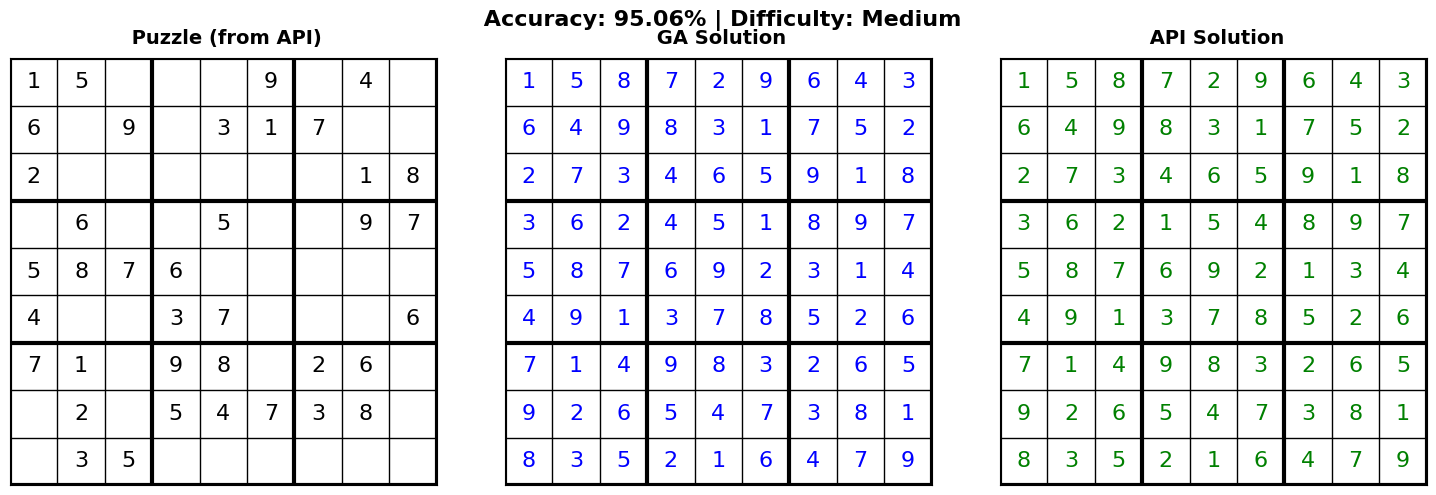

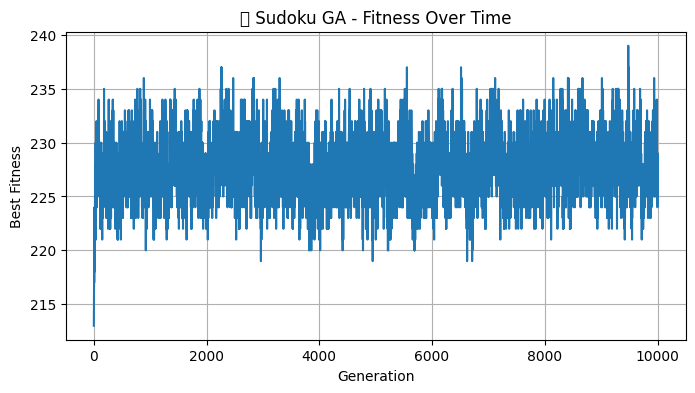


🎯 Accuracy (GA vs API): 95.06%--77/81


In [4]:
import numpy as np
import random
import requests
import matplotlib.pyplot as plt

# -------------------------------
# ⚙️ GA Parameters
# -------------------------------
POP_SIZE = 50
MUTATION_RATE = 0.2
GENERATIONS = 10000

# -------------------------------
# 🧠 Helper Functions
# -------------------------------
def generate_individual(puzzle):
    individual = np.zeros((9,9), dtype=int)
    for i in range(9):
        nums = set(range(1,10)) - set(puzzle[i])
        row = puzzle[i].copy()
        for j in range(9):
            if row[j] == 0:
                val = random.choice(list(nums))
                row[j] = val
                nums.remove(val)
        individual[i] = row
    return individual

def calculate_fitness(individual):
    score = 0
    for row in individual:
        score += len(set(row))
    for col in individual.T:
        score += len(set(col))
    for i in range(0,9,3):
        for j in range(0,9,3):
            block = individual[i:i+3, j:j+3].flatten()
            score += len(set(block))
    return score

def crossover(parent1, parent2):
    child = np.zeros((9,9), dtype=int)
    for i in range(9):
        child[i] = parent1[i] if random.random() < 0.5 else parent2[i]
    return child

def mutate(individual, fixed_positions):
    for i in range(9):
        if random.random() < MUTATION_RATE:
            available = [j for j in range(9) if not fixed_positions[i][j]]
            if len(available) >= 2:
                a, b = random.sample(available, 2)
                individual[i][a], individual[i][b] = individual[i][b], individual[i][a]
    return individual

def get_fixed_positions(puzzle):
    fixed = np.zeros((9,9), dtype=bool)
    fixed[puzzle != 0] = True
    return fixed

# -------------------------------
# 🔁 Genetic Algorithm
# -------------------------------
def genetic_algorithm(puzzle):
    fixed_positions = get_fixed_positions(puzzle)
    population = [generate_individual(puzzle) for _ in range(POP_SIZE)]
    best_fitness_over_time = []
    best_individual, best_fitness = None, 0

    for gen in range(GENERATIONS):
        fitness_scores = [calculate_fitness(ind) for ind in population]
        gen_best = max(fitness_scores)
        best_fitness_over_time.append(gen_best)

        if gen_best > best_fitness:
            best_fitness = gen_best
            best_individual = population[fitness_scores.index(gen_best)]

        if best_fitness == 243:
            print(f"✅ Sudoku solved at generation {gen}!")
            break

        new_population = []
        for _ in range(POP_SIZE):
            a, b = random.sample(range(POP_SIZE), 2)
            parent1 = population[a] if fitness_scores[a] > fitness_scores[b] else population[b]
            a, b = random.sample(range(POP_SIZE), 2)
            parent2 = population[a] if fitness_scores[a] > fitness_scores[b] else population[b]
            child = crossover(parent1, parent2)
            child = mutate(child, fixed_positions)
            new_population.append(child)

        population = new_population

        if gen % 50 == 0:
            print(f"Generation {gen} | Best fitness: {best_fitness}")

    return best_individual, best_fitness_over_time

# -------------------------------
# 🌐 Fetch Puzzle
# -------------------------------
def fetch_puzzle():
    url = "https://sudoku-api.vercel.app/api/dosuku"
    response = requests.get(url)
    data = response.json()
    puzzle = np.array(data["newboard"]["grids"][0]["value"])
    api_solution = np.array(data["newboard"]["grids"][0]["solution"])
    difficulty = data["newboard"]["grids"][0]["difficulty"]
    return puzzle, api_solution, difficulty

# -------------------------------
# 🧮 Display Sudoku Grid Nicely
# -------------------------------
def plot_sudoku_grid(ax, grid, title, color="black"):
    """Draws a Sudoku grid with numbers."""
    ax.set_title(title, fontsize=14, fontweight="bold", pad=10)
    ax.imshow(np.zeros((9, 9)), cmap="Greys", vmin=0, vmax=1)
    
    # Draw numbers
    for i in range(9):
        for j in range(9):
            num = grid[i, j]
            if num != 0:
                ax.text(j, i, str(num), va="center", ha="center", fontsize=16, color=color)
    
    # Draw thin lines for cells
    for x in range(10):
        lw = 1 if x % 3 else 3
        ax.axhline(x - 0.5, color="black", lw=lw)
        ax.axvline(x - 0.5, color="black", lw=lw)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-0.5, 8.5)
    ax.set_ylim(8.5, -0.5)

# -------------------------------
# 🚀 Run Everything
# -------------------------------
if __name__ == "__main__":
    print("📡 Fetching Sudoku from API...")
    puzzle, api_solution, difficulty = fetch_puzzle()
    print(f"🎯 Difficulty: {difficulty}\n")

    print("🧬 Running Genetic Algorithm...")
    ga_solution, fitness_history = genetic_algorithm(puzzle)

    correct = np.sum(ga_solution == api_solution)
    accuracy = (correct / 81) * 100 

    # -------------------------------
    # 🖼️ Visualize Everything
    # -------------------------------
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    plot_sudoku_grid(axes[0], puzzle, " Puzzle (from API)", color="black")
    print("")
    plot_sudoku_grid(axes[1], ga_solution, " GA Solution", color="blue")
    print("")
    plot_sudoku_grid(axes[2], api_solution, " API Solution", color="green")
    print("")
    plt.suptitle(f" Accuracy: {accuracy:.2f}% | Difficulty: {difficulty}", fontsize=16, fontweight="bold")
    plt.tight_layout()
    plt.show()

    # Plot fitness
    plt.figure(figsize=(8, 4))
    plt.plot(fitness_history)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.title("Sudoku GA - Fitness Over Time")
    plt.grid(True)
    plt.show()

    # Print results in console
    print(f"\n🎯 Accuracy (GA vs API): {accuracy:.2f}%--{correct}/81")
